In [1]:
from tensorboard.backend.event_processing import event_accumulator
import glob
import pandas as pd

In [18]:
def load_tf(dirname):
    ea = event_accumulator.EventAccumulator(dirname)
    ea.Reload()
    
    return ea

def get_scalars(ea):
    dframes = {}
    mnames = ea.Tags()['scalars']
    for n in mnames:
        dframes[n] = pd.DataFrame(ea.Scalars(n), columns=["wall_time", "epoch", n.replace('val/', '')])
        dframes[n].drop("wall_time", axis=1, inplace=True)
        dframes[n] = dframes[n].set_index("epoch")
    return pd.concat([v for k,v in dframes.items()], axis=1)

def get_histograms(ea):
    pass


In [19]:
dirname = "runs/final-toy/model-error/"

In [20]:
dirname = glob.glob(dirname + '/PIMP*')[0]

In [22]:
data = load_tf(dirname)

In [24]:
data.Tags()['histograms']

['distributions/ADE/test', 'distributions/FDE/test', 'distributions/loss/test']

In [32]:
data.Histograms('distributions/FDE/test')

[HistogramEvent(wall_time=1664747699.523627, step=299, histogram_value=HistogramValue(min=0.11297733336687088, max=1.034361481666565, num=576.0, sum=191.94636122137308, sum_squares=80.88867838797941, bucket_limit=[0.11268002566852665, 0.12394802823537933, 0.13634283105891729, 0.14997711416480902, 0.16497482558128992, 0.18147230813941892, 0.19961953895336082, 0.2195814928486969, 0.24153964213356663, 0.2656936063469233, 0.29226296698161564, 0.3214892636797772, 0.35363819004775493, 0.38900200905253046, 0.42790220995778355, 0.47069243095356195, 0.5177616740489182, 0.56953784145381, 0.6264916255991911, 0.6891407881591103, 0.7580548669750213, 0.8338603536725235, 0.917246389039776, 1.0089710279437536, 1.109868130738129], bucket=[0.0, 3.0, 6.0, 18.0, 26.0, 28.0, 23.0, 37.0, 53.0, 61.0, 47.0, 38.0, 34.0, 62.0, 30.0, 15.0, 16.0, 24.0, 17.0, 16.0, 1.0, 6.0, 3.0, 9.0, 3.0]))]

In [34]:
data.Tags()['images']

['train/example_fig']

In [46]:
img = data.Images('train/example_fig')[-1]

In [60]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

In [61]:
i = io.BytesIO(img.encoded_image_string)
i = mpimg.imread(i, format='JPG')

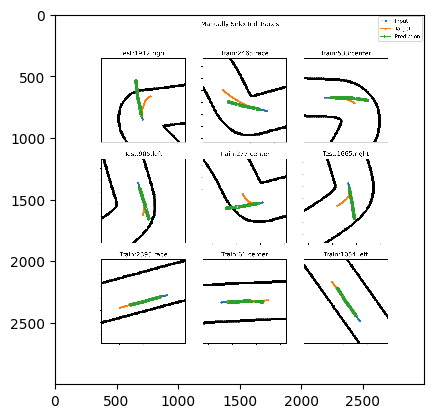

In [62]:
plt.imshow(i, interpolation='nearest')
plt.show()